In [2]:
## Use Python libraries
from dotenv import load_dotenv
load_dotenv()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Visualization").getOrCreate()
import matplotlib.pyplot as plt


In [3]:
# Load Data to Dataframe from Databse
df1=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                      user=os.getenv("MYSQL_USER"),\
                                      password=os.getenv("MYSQL_PASS"),\
                                      url="jdbc:mysql://{}:3306/creditcard_capstone".format(os.getenv("MYSQL_HOST")),\
                                      dbtable="CDW_SAPP_BRANCH").load()

df2=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                      user=os.getenv("MYSQL_USER"),\
                                      password=os.getenv("MYSQL_PASS"),\
                                      url="jdbc:mysql://{}:3306/creditcard_capstone".format(os.getenv("MYSQL_HOST")),\
                                      dbtable="CDW_SAPP_CREDIT_CARD").load()

df3=spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                      user=os.getenv("MYSQL_USER"),\
                                      password=os.getenv("MYSQL_PASS"),\
                                      url="jdbc:mysql://{}:3306/creditcard_capstone".format(os.getenv("MYSQL_HOST")),\
                                      dbtable="CDW_SAPP_CUSTOMER").load()


In [4]:
# PySpark DataFrame can be converted to Python pandas DataFrame using a function toPandas()
dfp1=df1.toPandas()
dfp2=df2.toPandas()
dfp3=df3.toPandas()
#dfp1.head()
#df2.show()
#dfp3.head()

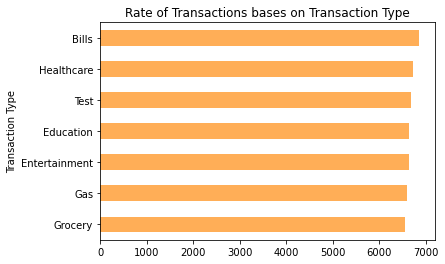

In [11]:
# Find and plot transactions, showing which transaction type occurs most often.
dfg1=dfp2.groupby(['TRANSACTION_TYPE'])['TRANSACTION_ID'].count().sort_values()

dfg1.plot(kind='barh',color='#ffae57',xlabel='Transaction Type',ylabel='Number of Transactions')
plt.title('Rate of Transactions bases on Transaction Type')
plt.show()


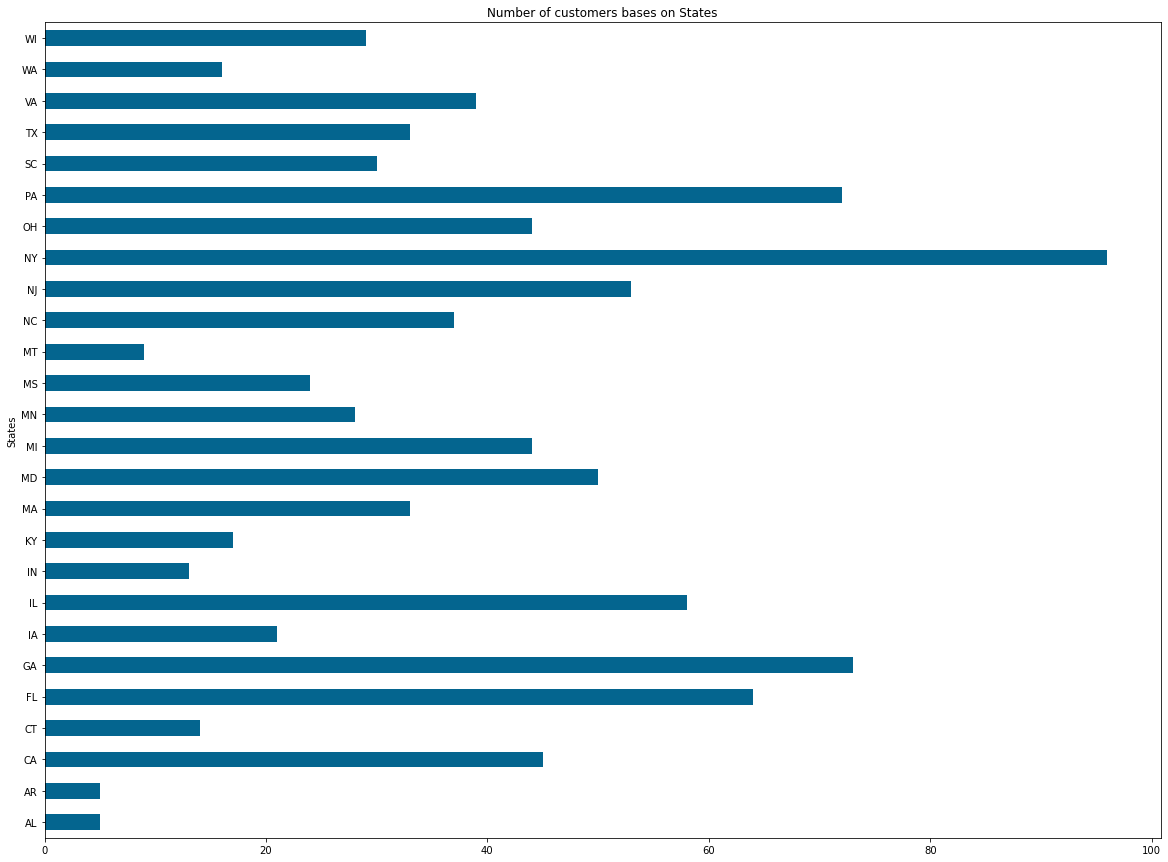

In [6]:
# Find and plot which state has a high number of customers.
dfg2=dfp3.groupby(['CUST_STATE'])['SSN'].count()

dfg2.plot(kind='barh',color='#04658F',xlabel='States',figsize=(20,15))
plt.title('Number of customers bases on States')
plt.show()

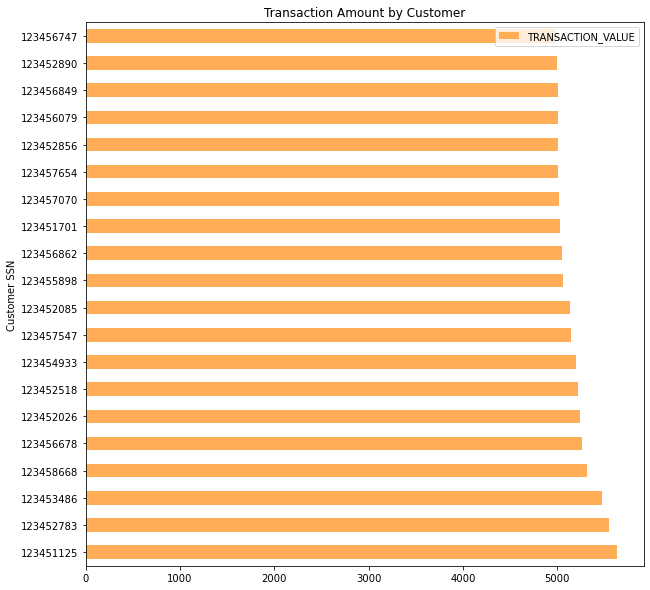

In [7]:
# Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
# hint(use CUST_SSN).
dfg3=dfp2.groupby(['CUST_SSN'])['TRANSACTION_VALUE'].sum().reset_index()

# Get Top 20 maximum transaction amount
dfg3n=dfg3.sort_values(by='TRANSACTION_VALUE', ascending=False).head(20)


dfg3n.plot(kind='barh',x='CUST_SSN', y='TRANSACTION_VALUE',color='#ffae57',xlabel='Customer SSN',ylabel='Transaction Amount',figsize=(10,10))
plt.title('Transaction Amount by Customer')
plt.show()


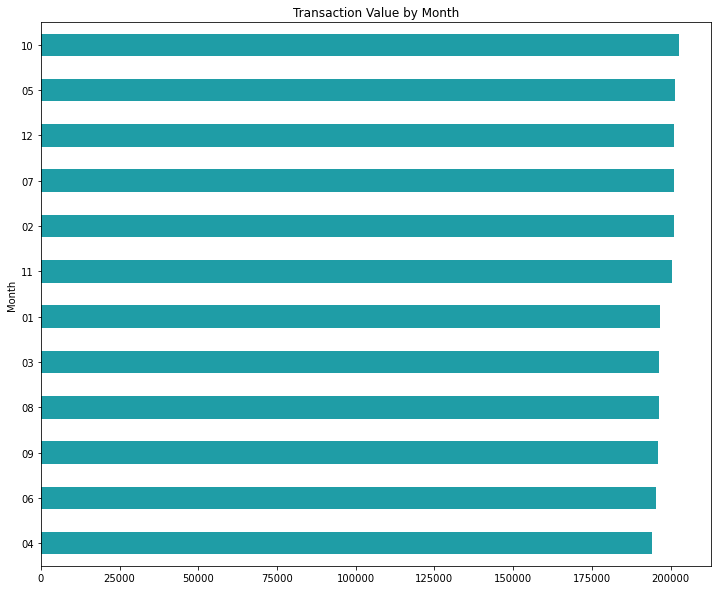

In [12]:
#Find and plot the top three months with the largest transaction data.

dfp2['MONTH']=dfp2.TIMEID.str.slice(4, 6)

dfg4=dfp2.groupby(['MONTH'])['TRANSACTION_VALUE'].sum().sort_values()

dfg4.plot(kind='barh',color='#1f9da6',xlabel='Month',figsize=(12,10))
plt.title('Transaction Value by Month')
plt.show()

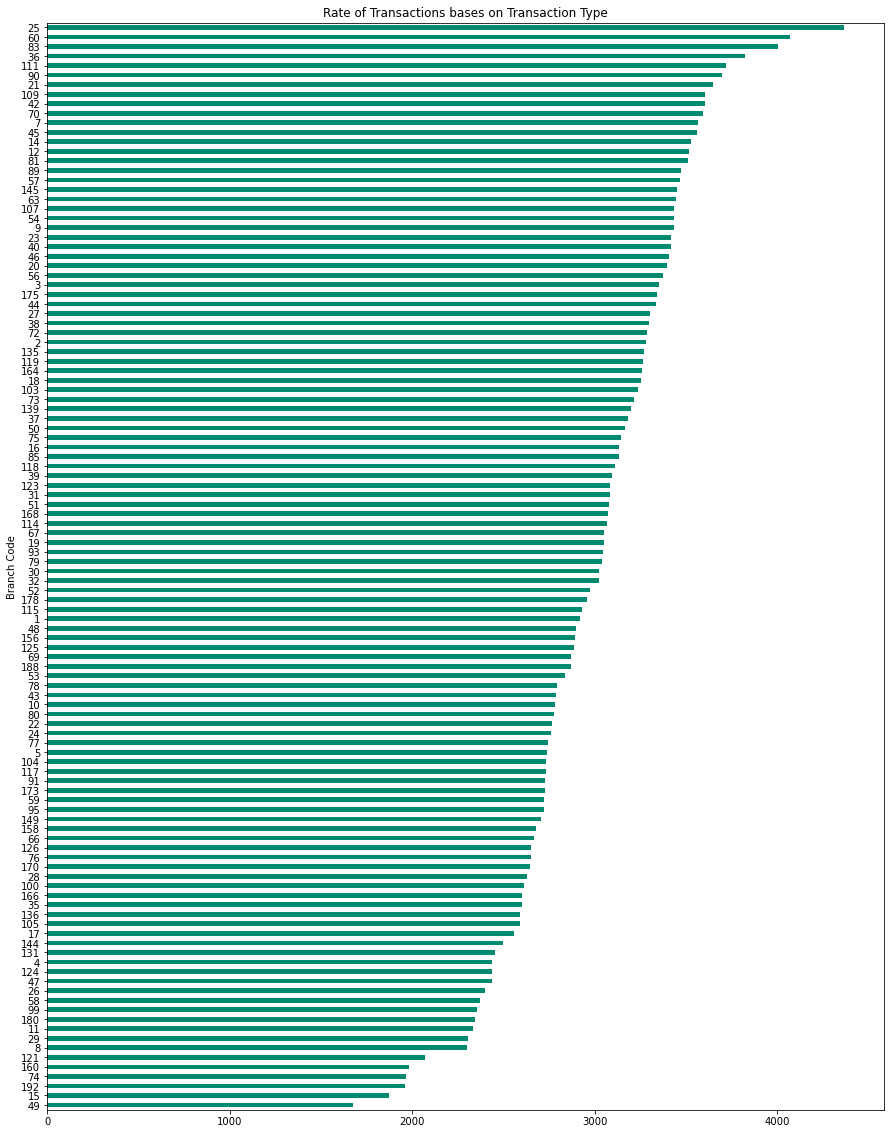

In [10]:
#Find and plot each branches healthcare transactions, showing which branch processed the highest total dollar value of healthcare transactions.
dfg5=dfp2.query("TRANSACTION_TYPE=='Healthcare'")

dfg5n=dfg5.groupby(['BRANCH_CODE'])['TRANSACTION_VALUE'].sum().sort_values()


dfg5n.plot(kind='barh',color='#008B71',xlabel='Branch Code',ylabel='Transactions',figsize=(15,20))
plt.title('Rate of Transactions bases on Transaction Type')
plt.show()
